In [2]:
# Instalasi pustaka hdbscan (tidak tersedia default di sklearn)
%pip install matplotlib
%pip install hdbscan --prefer-binary

# Import modul
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import hdbscan

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 7.6 MB/s eta 0:00:01
   --------- ------------------------------ 1.8/8.1 MB 4.2 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 5.4 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 6.4 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.8 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   -------------------------------- ------- 1.8/2.3 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 7.5 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------- ----------------------------- 1.8/7.0 MB 8.4 MB/s eta 0:00:01
   --------------------- ------------------ 3.7/7.0 MB 9.1 MB/s eta 0:00:01
   ------------------------------- ----

In [3]:
#Langkah 2: Definisi Fungsi Visualisasi
# Jalankan fungsi ini agar kita bisa mem-plot hasil clustering dengan warna berbeda.

def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # warna hitam untuk noise
        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

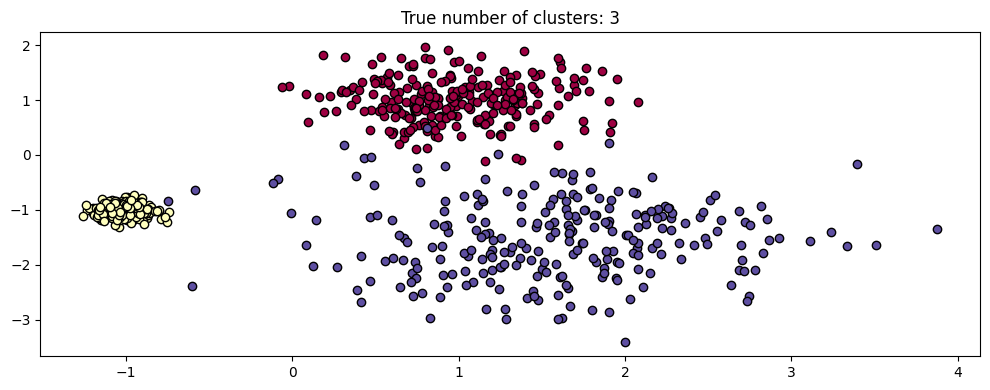

In [4]:
#Langkah 3: Membuat Dataset Sintetis
# Dataset terdiri dari 3 buah cluster Gaussian.

centers = [[1, 1], [-1, -1], [1.5, -1.5]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.4, 0.1, 0.75], random_state=0
)

plot(X, labels=labels_true, ground_truth=True)

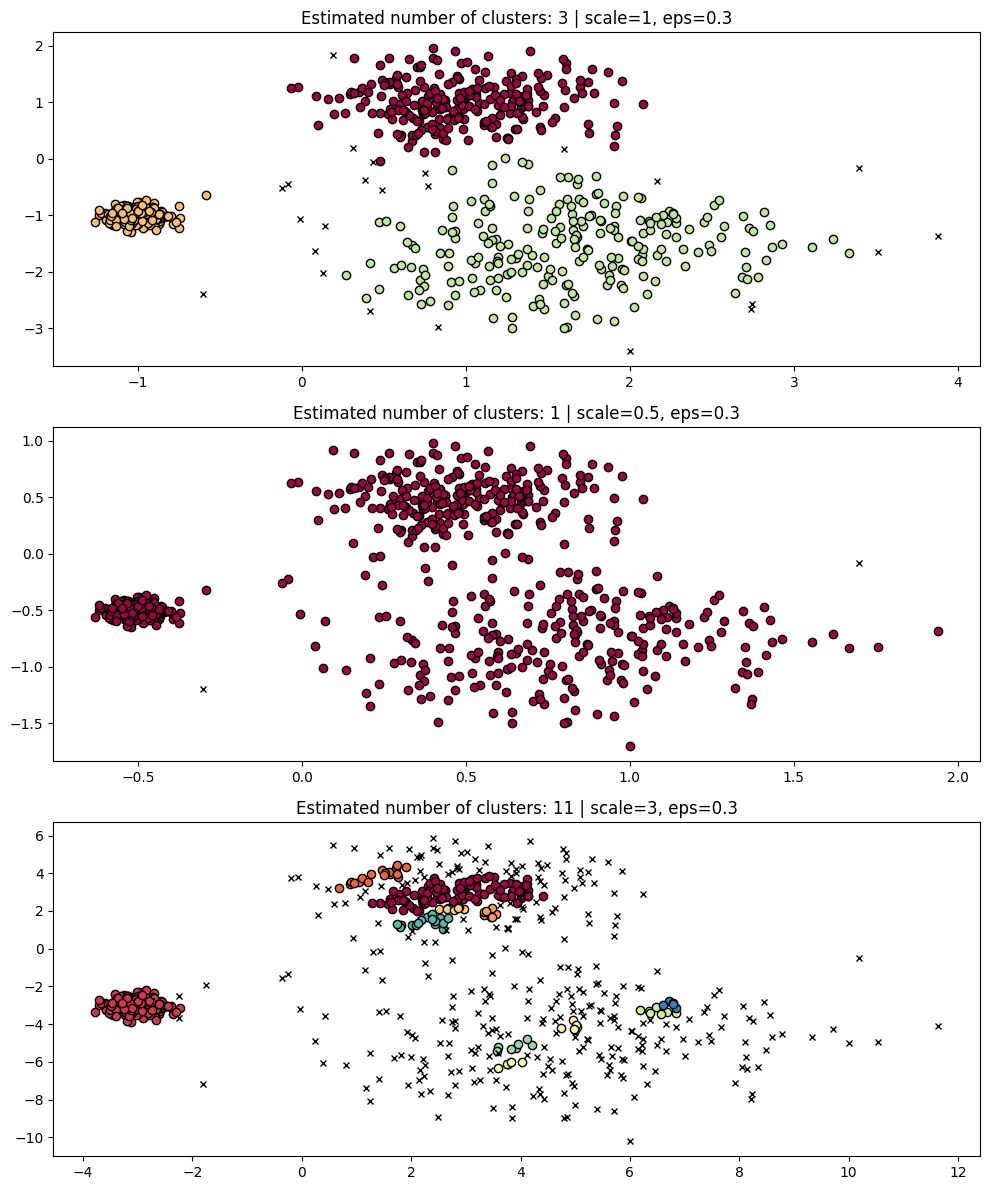

In [5]:
#Langkah 4: Uji Scale Invariance pada DBSCAN
# Jalankan DBSCAN dengan eps=0.3 pada dataset yang di-scale.

fig, axes = plt.subplots(3, 1, figsize=(10, 12))
dbs = DBSCAN(eps=0.3)
for idx, scale in enumerate([1, 0.5, 3]):
    dbs.fit(X * scale)
    plot(X * scale, dbs.labels_, parameters={"scale": scale, "eps": 0.3}, ax=axes[idx])

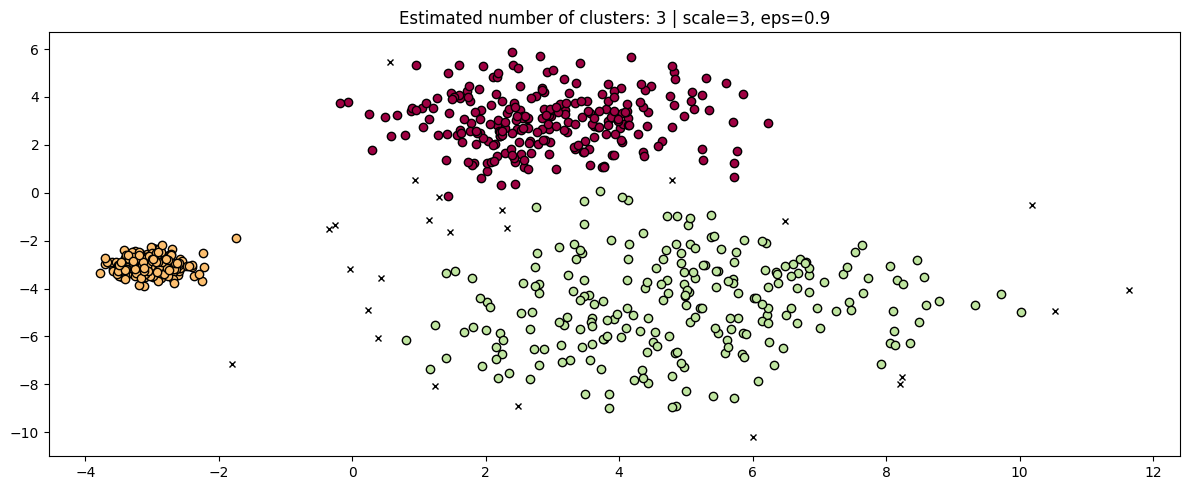

In [6]:
# Perbaiki dengan mengubah eps sesuai skala:

fig, axis = plt.subplots(1, 1, figsize=(12, 5))
dbs = DBSCAN(eps=0.9).fit(3 * X)
plot(3 * X, dbs.labels_, parameters={"scale": 3, "eps": 0.9}, ax=axis)

c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finit

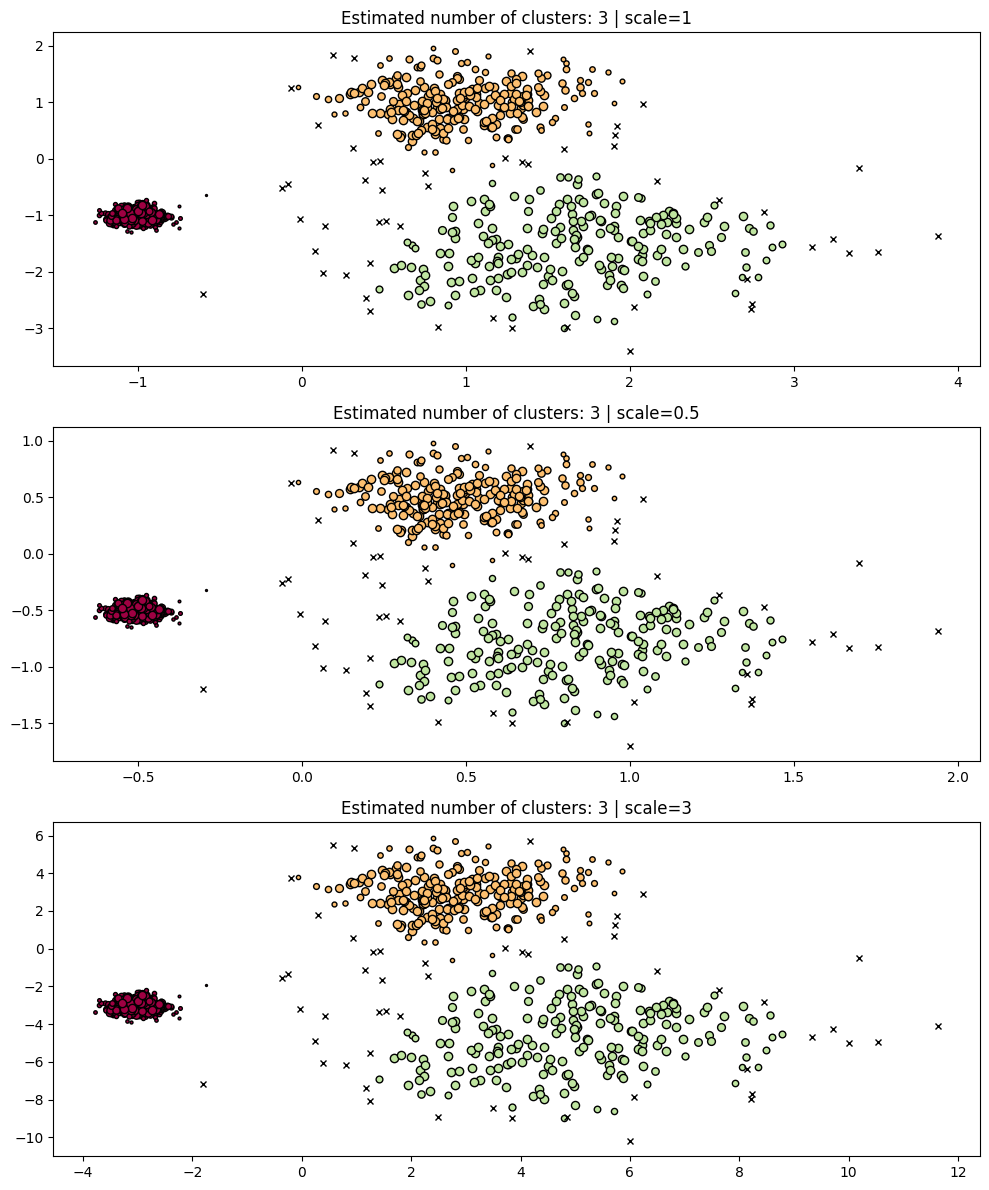

In [7]:
# Langkah 5: Bandingkan dengan HDBSCAN (lebih robust)
# Jalankan HDBSCAN pada dataset berskala berbeda.

fig, axes = plt.subplots(3, 1, figsize=(10, 12))
hdb = hdbscan.HDBSCAN()
for idx, scale in enumerate([1, 0.5, 3]):
    hdb.fit(X * scale)
    plot(X * scale, hdb.labels_, hdb.probabilities_, ax=axes[idx], parameters={"scale": scale})

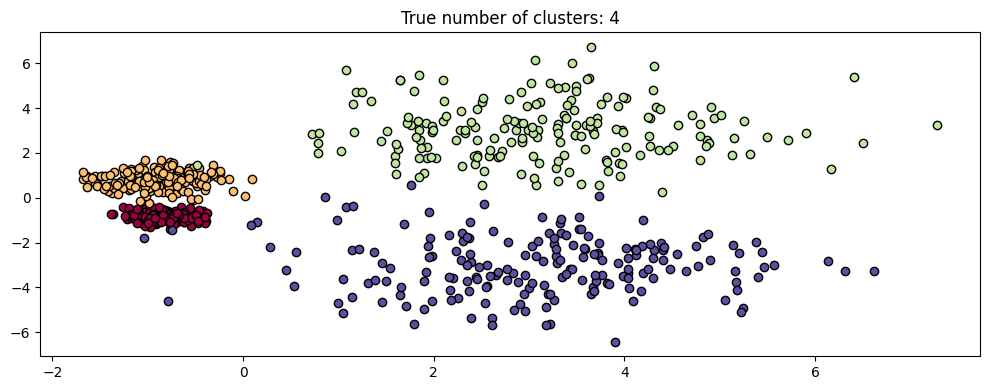

In [33]:
#Langkah 6: Multi-Scale Clustering
# Buat dataset baru dengan kepadatan berbeda.

centers = [[-0.85, -0.85], [-0.85, 0.85], [3, 3], [3, -3]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.2, 0.35, 1.35, 1.35], random_state=0
)
plot(X, labels=labels_true, ground_truth=True)

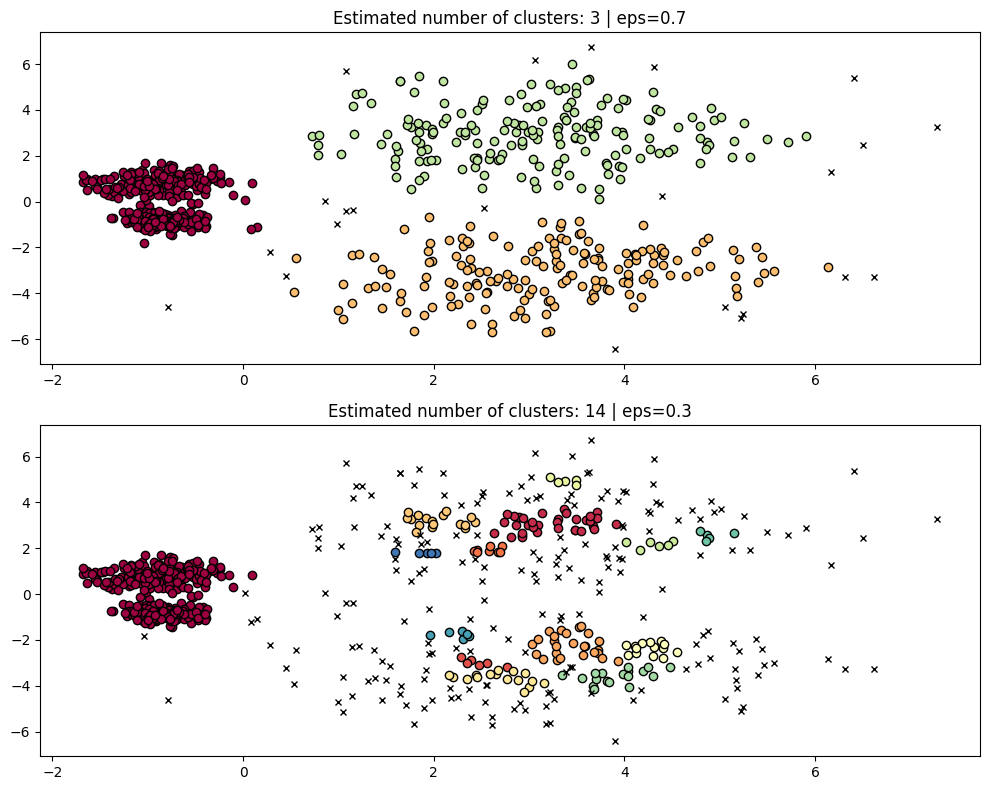

In [9]:
# Bandingkan DBSCAN dengan eps berbeda:

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
params = {"eps": 0.7}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[0])

params = {"eps": 0.3}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[1])

c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


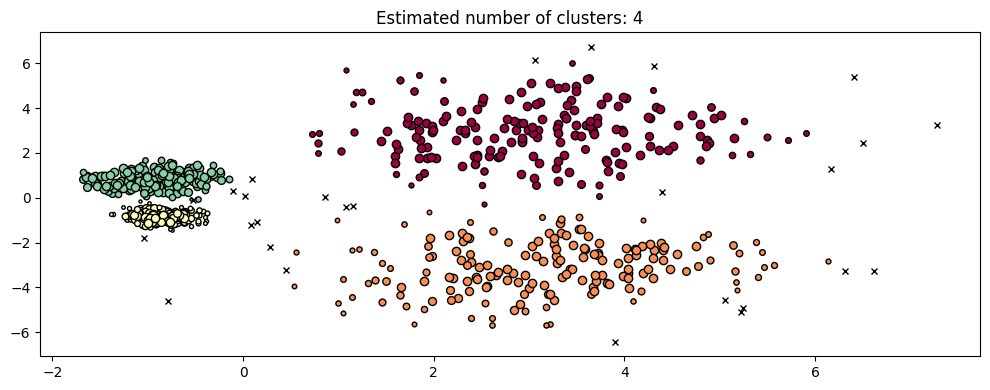

In [10]:
# Jalankan HDBSCAN:

hdb = hdbscan.HDBSCAN().fit(X)
plot(X, hdb.labels_, hdb.probabilities_)

c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finit

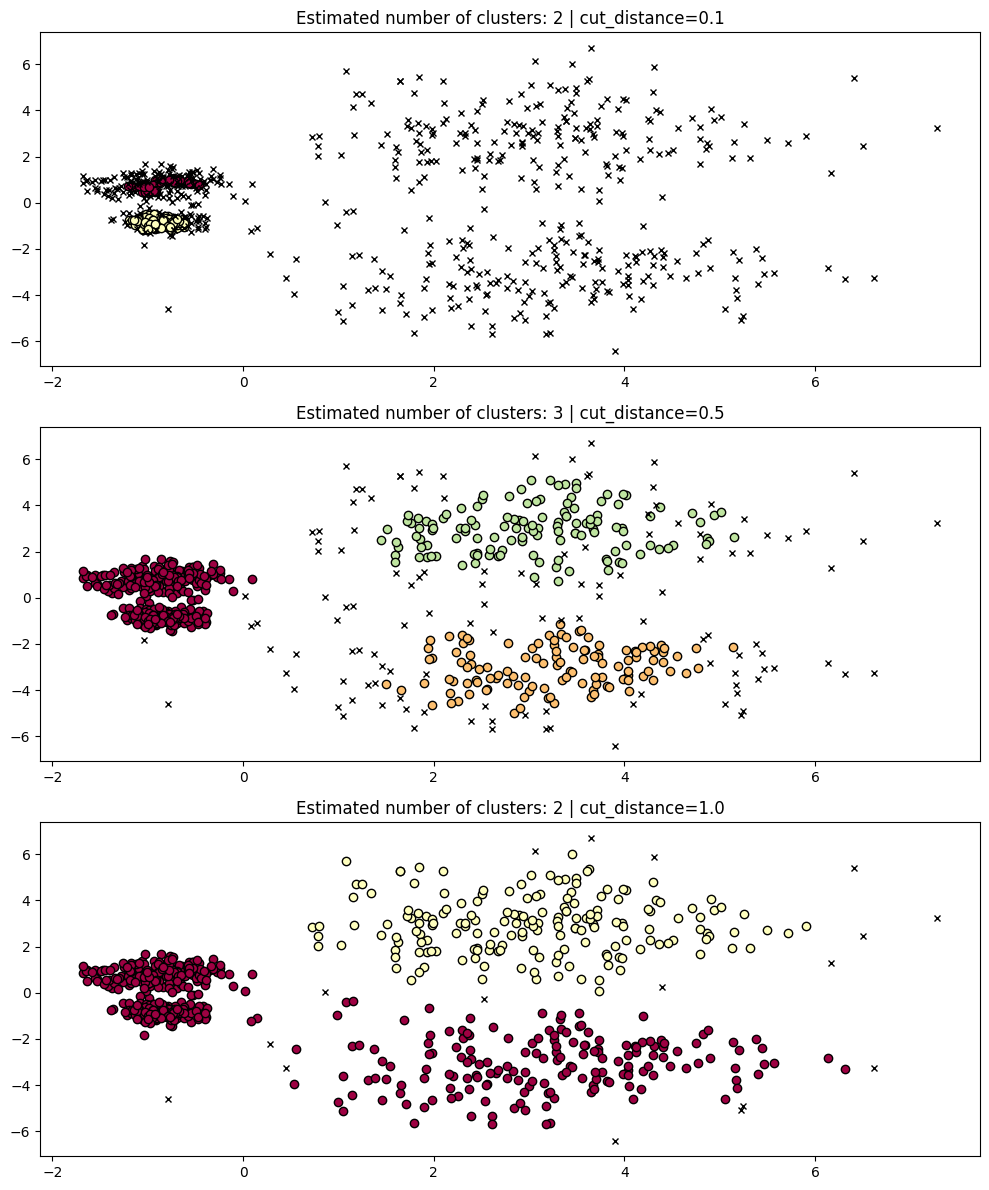

In [23]:
# Langkah 9: HDBSCAN dengan cut distance berbeda
# Bandingkan hasil clustering dengan cut distance yang berbeda

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for idx, cut_distance in enumerate([0.1, 0.5, 1.0]):
    hdb_cut = hdbscan.HDBSCAN().fit(X)
    labels_cut = hdb_cut.single_linkage_tree_.get_clusters(cut_distance, min_cluster_size=5)
    plot(X, labels_cut, parameters={"cut_distance": cut_distance}, ax=axes[idx])

## Praktikum 2

Setelah pada praktikum pertama kita membandingkan HDBSCAN dengan DBSCAN dan melihat keunggulannya, pada praktikum kedua ini kita akan fokus hanya pada HDBSCAN. Tujuannya adalah memahami bagaimana hasil clustering dapat dipengaruhi oleh perubahan hyperparameter. Dengan mencoba berbagai nilai untuk min_cluster_size, min_samples, dan cut_distance, kita akan melihat bagaimana HDBSCAN mengatur jumlah cluster, memisahkan noise, dan menyesuaikan diri terhadap struktur data yang berbeda.

c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finit

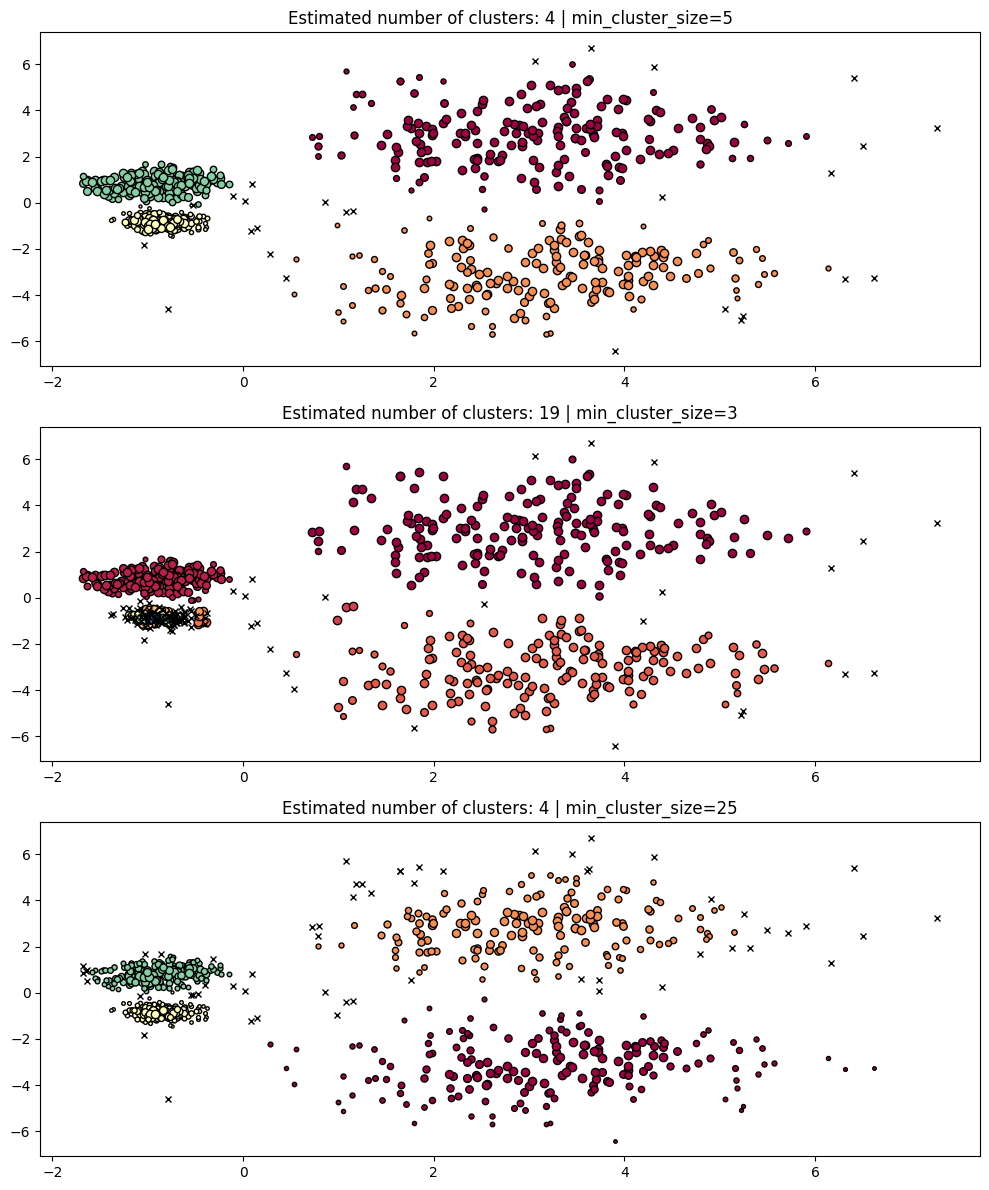

In [24]:
# Langkah 7: Eksperimen Hyperparameter min_cluster_size
# Ubah nilai min_cluster_size.

PARAM = ({"min_cluster_size": 5}, {"min_cluster_size": 3}, {"min_cluster_size": 25})
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finit

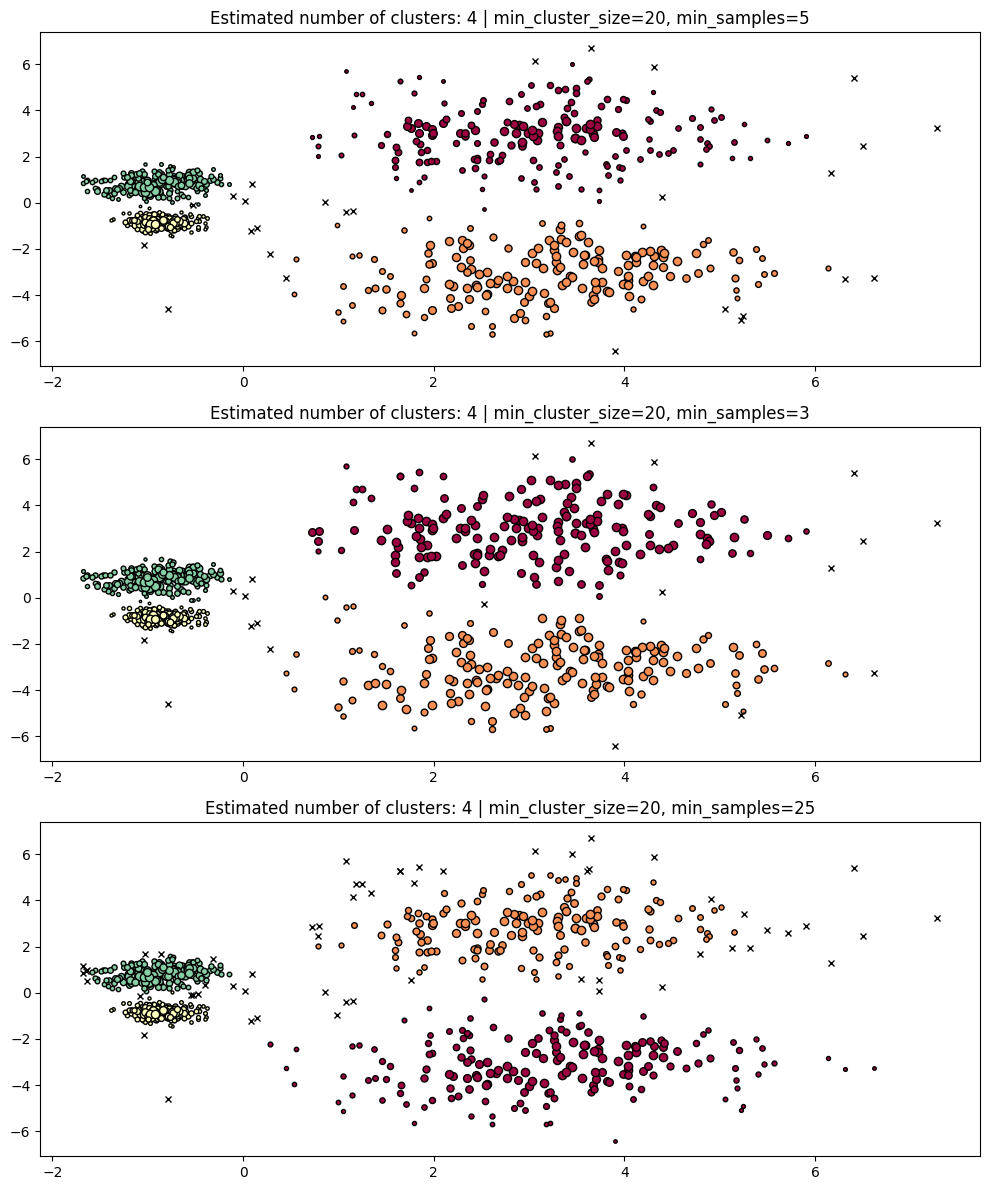

In [25]:
# Langkah 8: Eksperimen Hyperparameter min_samples
# Ubah nilai min_samples.

PARAM = (
    {"min_cluster_size": 20, "min_samples": 5},
    {"min_cluster_size": 20, "min_samples": 3},
    {"min_cluster_size": 20, "min_samples": 25},
)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


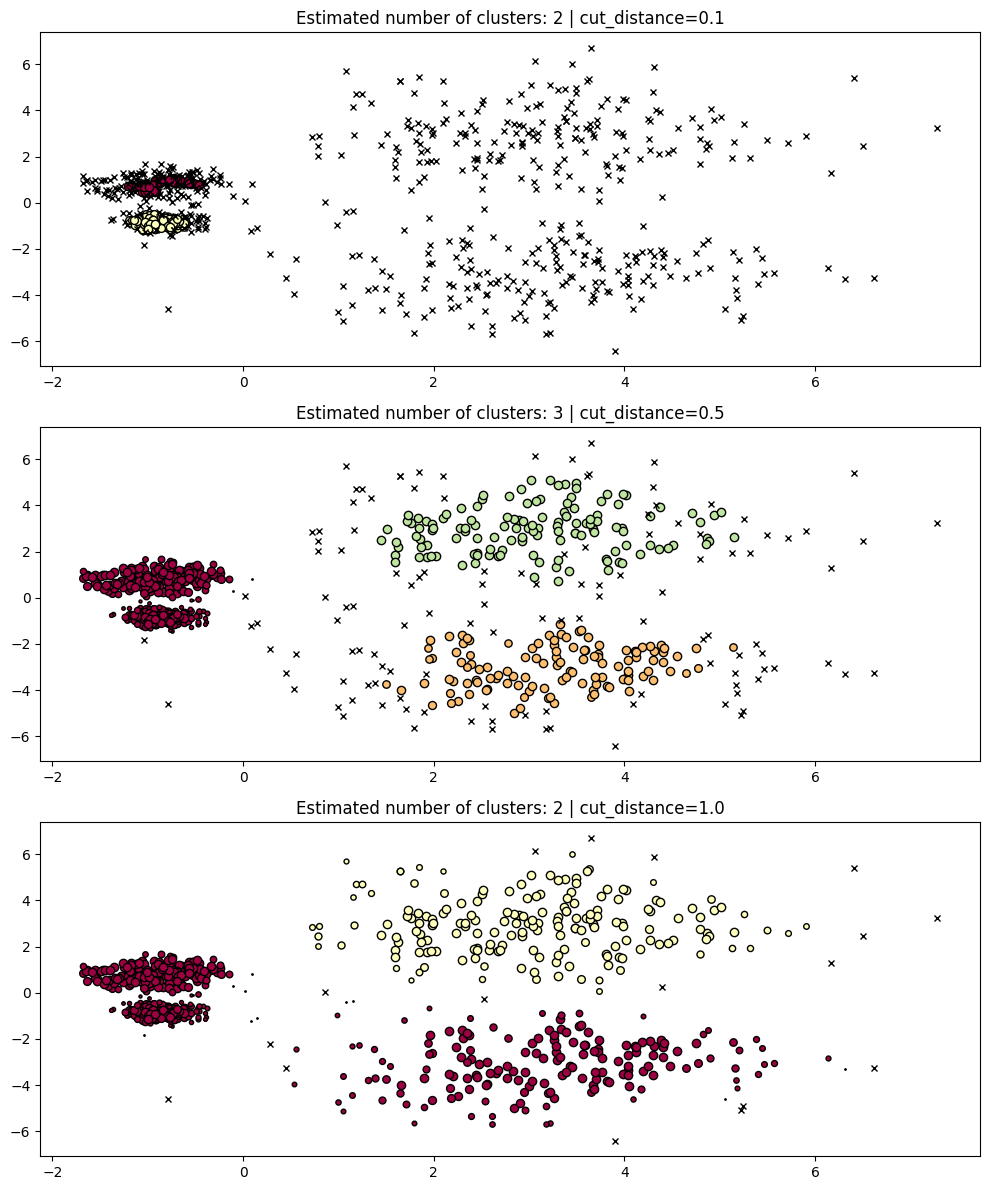

In [26]:
# Langkah 9: DBSCAN Clustering dari Pohon HDBSCAN
# Gunakan parameter cut_distance.

PARAM = (
    {"cut_distance": 0.1},
    {"cut_distance": 0.5},
    {"cut_distance": 1.0},
)
hdb = hdbscan.HDBSCAN().fit(X)
fig, axes = plt.subplots(len(PARAM), 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    labels = hdb.dbscan_clustering(**param)
    plot(X, labels, hdb.probabilities_, param, ax=axes[i])

In [27]:
# Langkah 10: Evaluasi dengan Silhouette Score
# Silhouette Score adalah metrik yang mengukur seberapa baik sebuah data titik di-cluster dalam grupnya sendiri dibandingkan dengan jarak ke grup terdekat lainnya. Nilai Silhouette Score berkisar antara -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan bahwa titik data lebih terisolasi dan lebih cocok dengan cluster-nya.

# Jalankan kode berikut untuk menghitung Silhouette Score:

from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk hasil clustering HDBSCAN
sil_score = silhouette_score(X, hdb.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5743816709862986


Jika nilai Silhouette Score mendekati 1, ini menunjukkan bahwa clustering berhasil memisahkan data dengan baik.

Nilai negatif menunjukkan bahwa data mungkin salah kelompok atau tidak tercluster dengan baik.

Langkah 11: Evaluasi dengan Davies-Bouldin Index
Davies-Bouldin Index (DBI) adalah metrik yang mengukur kualitas clustering berdasarkan jarak antar cluster dan seberapa besar sebaran dalam masing-masing cluster. Semakin kecil nilai DBI, semakin baik clustering yang dihasilkan. Nilai DBI yang rendah menunjukkan bahwa cluster saling terpisah dengan baik, sementara nilai yang tinggi menunjukkan bahwa cluster mungkin tumpang tindih.

Jalankan kode berikut untuk menghitung Davies-Bouldin Index:

In [28]:
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin Index untuk hasil clustering HDBSCAN
dbi_score = davies_bouldin_score(X, hdb.labels_)
print(f"Davies-Bouldin Index: {dbi_score}")

Davies-Bouldin Index: 1.6436030674842066



Davies-Bouldin Index yang lebih rendah menunjukkan bahwa clustering lebih baik karena cluster lebih terpisah dengan jelas dan homogen.

Nilai yang lebih tinggi menunjukkan bahwa cluster lebih saling tumpang tindih dan kurang terpisah dengan jelas.

Langkah 12: Visualisasi Hasil Evaluasi
Setelah menghitung Silhouette Score dan Davies-Bouldin Index, kita dapat membuat visualisasi untuk mempermudah pemahaman. Anda bisa memplot hasil Silhouette Score dan Davies-Bouldin Index dalam bentuk grafik untuk membandingkan berbagai eksperimen dengan hyperparameter yang berbeda.

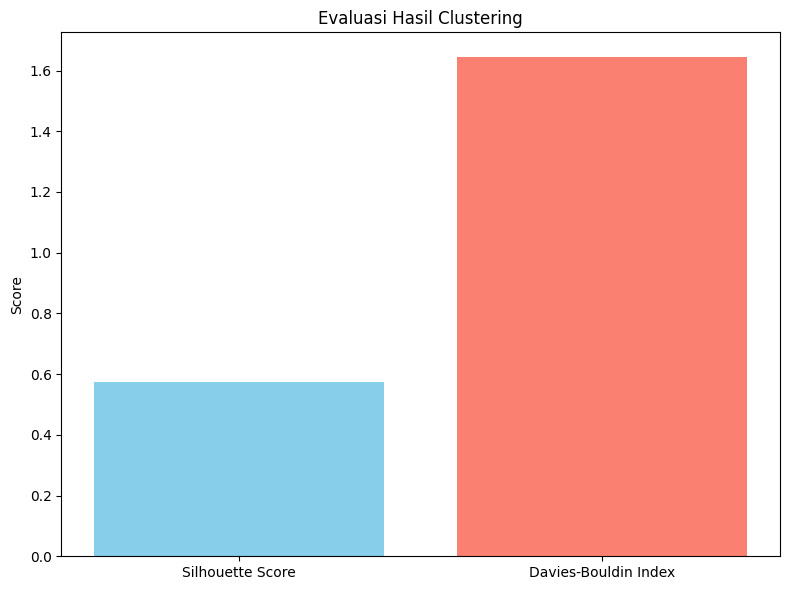

In [29]:
# Misalnya kita ingin membandingkan DBI dan Silhouette Score untuk beberapa eksperimen
scores = {
    "Silhouette Score": sil_score,
    "Davies-Bouldin Index": dbi_score
}

# Plot hasil evaluasi
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(scores.keys(), scores.values(), color=['skyblue', 'salmon'])
ax.set_title("Evaluasi Hasil Clustering")
ax.set_ylabel("Score")
plt.tight_layout()
plt.show()